In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import pylab as pl
import matplotlib.pyplot as plt
from epimodel import preprocess_data


In [2]:
def make_features(gatherings_aggregation, gatherings_aggregation_type):
    data = preprocess_data('../../data/all_merged_data.csv')
    data.featurize(gatherings_aggregation = gatherings_aggregation, gatherings_aggregation_type=gatherings_aggregation_type, keep_merged_value=True)
    return data

out_in_weaker = make_features('out_in', 'weaker')
pub_priv_weaker = make_features('pub_priv', 'weaker')
out_in_stricter = make_features('out_in', 'stricter')
pub_priv_stricter = make_features('pub_priv', 'stricter')
aggregations = [out_in_weaker, out_in_stricter, pub_priv_weaker, pub_priv_stricter]
aggregation_names = ['out_in_weaker', 'out_in_stricter','pub_priv_weaker', 'pub_priv_stricter']

all_features = make_features('none', 'none')
non_featurized = preprocess_data('../../data/all_merged_data.csv')

generated ['Some Face-to-Face Businesses Closed', 'Gastronomy Closed', 'Leisure Venues Closed', 'Curfew', 'Childcare Closed', 'Primary Schools Closed', 'Secondary Schools Closed', 'Universities Away', 'Stay at Home Order AND All F2F Businesses Closed', 'Public Gathering Person Limit', 'Public Gathering Person Limit - 1', 'Public Gathering Person Limit - 6', 'Public Gathering Person Limit - 30', 'Public Gathering Person Limit - 200', 'Extra Public Household Limit', 'Private Gathering Person Limit', 'Private Gathering Person Limit - 1', 'Private Gathering Person Limit - 6', 'Private Gathering Person Limit - 30', 'Private Gathering Person Limit - 200', 'Extra Private Household Limit', 'Mandatory Mask Wearing >= 3'] are the CM set
generated ['Some Face-to-Face Businesses Closed', 'Gastronomy Closed', 'Leisure Venues Closed', 'Curfew', 'Childcare Closed', 'Primary Schools Closed', 'Secondary Schools Closed', 'Universities Away', 'Stay at Home Order AND All F2F Businesses Closed', 'Outdoor G

In [ ]:

def raw_plots(region_ind, non_featurized):
    j = 0
    raw_CMs = [CM for CM in non_featurized.CMs if 'Limit' in CM]
    raw_indices = np.where(np.isin(raw_CMs,non_featurized.CMs))

    fig = plt.figure(figsize=((25,5)))
    for r in list(raw_indices)[0]:
        ax =  fig.add_subplot(2, 4, j+1)
        limits = non_featurized.active_cms[region_ind, r, :]
        sns.lineplot(x=non_featurized.Ds, y=list(limits), label = f'{non_featurized.CMs[r]}', ax = ax)
        j += 1
    pl.suptitle(f'{non_featurized.Rs[region_ind]}: Raw limit plots')
    plt.show()

def plot_aggregation(region_ind, aggregation, aggregation_name, non_featurized):
    j = 0
    # raw_CMs = [CM for CM in aggregation.CMs if 'Limit' in CM]
    # print(raw_CMs)
    # print(aggregation.CMs)
    raw_indices = [i for i in range(len(aggregation.CMs)) if 'Limit' in aggregation.CMs[i]]

    fig = plt.figure(figsize=((25,10)))
    for r in raw_indices:
        ax =  fig.add_subplot(4, 4, j+1)
        limits = aggregation.active_cms[region_ind, r, :]
        sns.lineplot(x=non_featurized.Ds, y=list(limits), label = f'{aggregation.CMs[r]}', ax = ax)
        j += 1
    pl.suptitle(f'{non_featurized.Rs[region_ind]} - {aggregation_name} - Binary plots', size = 12)
    plt.show()

def plot_all_features(region_ind, all_features, non_featurized):
    j = 0
    raw_indices = [i for i in range(len(all_features.CMs)) if 'Limit' in all_features.CMs[i]]

    fig = plt.figure(figsize=((20,40)))
    for r in raw_indices:
        ax =  fig.add_subplot(8, 4, j+1)
        limits = all_features.active_cms[region_ind, r, :]
        sns.lineplot(x=non_featurized.Ds, y=list(limits), label = f'{all_features.CMs[r]}', ax = ax)
        j += 1
    pl.suptitle(f'All features countplots')
    plt.show()

def region_plotter(region_ind, aggregations, aggregation_names, non_featurized):
    raw_plots(region_ind, non_featurized)
    plot_all_features(region_ind, all_features, non_featurized)
    for aggregation, aggregation_name in zip(aggregations, aggregation_names):
        plot_aggregation(region_ind, aggregation, aggregation_name, non_featurized)

def plot_all_aggregations(aggregations, aggregation_names, non_featurized):
    for region_ind in range(len(non_featurized.Rs)):
        region_plotter(region_ind, aggregations, aggregation_names, non_featurized)


In [ ]:
# plot_all_aggregations(aggregations, aggregation_names, non_featurized)
region_plotter(8, aggregations, aggregation_names, non_featurized)

In [16]:
def raw_plots(non_featurized):
    j = 0
    raw_CMs = [CM for CM in non_featurized.CMs if 'Limit' in CM]
    raw_indices = np.where(np.isin(raw_CMs,non_featurized.CMs))
    fig = plt.figure(figsize=((20,15)))
    for r in list(raw_indices)[0]:
        ax =  fig.add_subplot(2, 4, j+1)
        ax.set(ylim=(0, 5000))
        # limits = non_featurized.active_cms[:, r, :]
        data = pd.DataFrame(np.reshape(non_featurized.active_cms[:, r, :], (1,-1)).T, dtype=int)
        data.columns = [non_featurized.CMs[r]]
        plt.xticks(rotation=70)
        sns.countplot(x=non_featurized.CMs[r], data = data, label = f'{non_featurized.CMs[r]}', ax = ax)
        j += 1
    pl.suptitle(f'Raw limit plots')
    plt.show()

def plot_all_features(all_features, non_featurized):
    j = 0
    raw_indices = [i for i in range(len(all_features.CMs)) if 'Limit' in all_features.CMs[i]]

    fig = plt.figure(figsize=((20,40)))
    for r in raw_indices:
        ax =  fig.add_subplot(8, 4, j+1)
        ax.set(ylim=(0, 5000))
        # limits = non_featurized.active_cms[:, r, :]
        data = pd.DataFrame(np.reshape(all_features.active_cms[:, r, :], (1,-1)).T, dtype=int)
        data.columns = [all_features.CMs[r]]
        plt.xticks(rotation=70)
        sns.countplot(x=all_features.CMs[r], data = data, label = f'{all_features.CMs[r]}', ax = ax)
        j += 1
    pl.suptitle(f'All features countplots')
    plt.show()

def plot_aggregation(aggregation, aggregation_name):
    j = 0
    raw_indices = [9, 15]

    fig = plt.figure(figsize=((20,10)))
    for r in raw_indices:
        ax =  fig.add_subplot(1, 2, j+1)
        ax.set(ylim=(0, 5000))
        data = pd.DataFrame(np.reshape(aggregation.active_cms[:, r, :], (1,-1)).T, dtype=int)
        data.columns = [aggregation.CMs[r]]
        plt.xticks(rotation=70)
        sns.countplot(x=aggregation.CMs[r], data = data, label = f'{aggregation.CMs[r]}', ax = ax)
        j += 1
    pl.suptitle(f'{aggregation_name} - count plots', size = 12)
    plt.show()

def total_plotter(aggregations, aggregation_names, non_featurized):
    raw_plots(non_featurized)
    # plot_all_features(all_features, non_featurized)
    for aggregation, aggregation_name in zip(aggregations, aggregation_names):
        plot_aggregation(aggregation, aggregation_name)

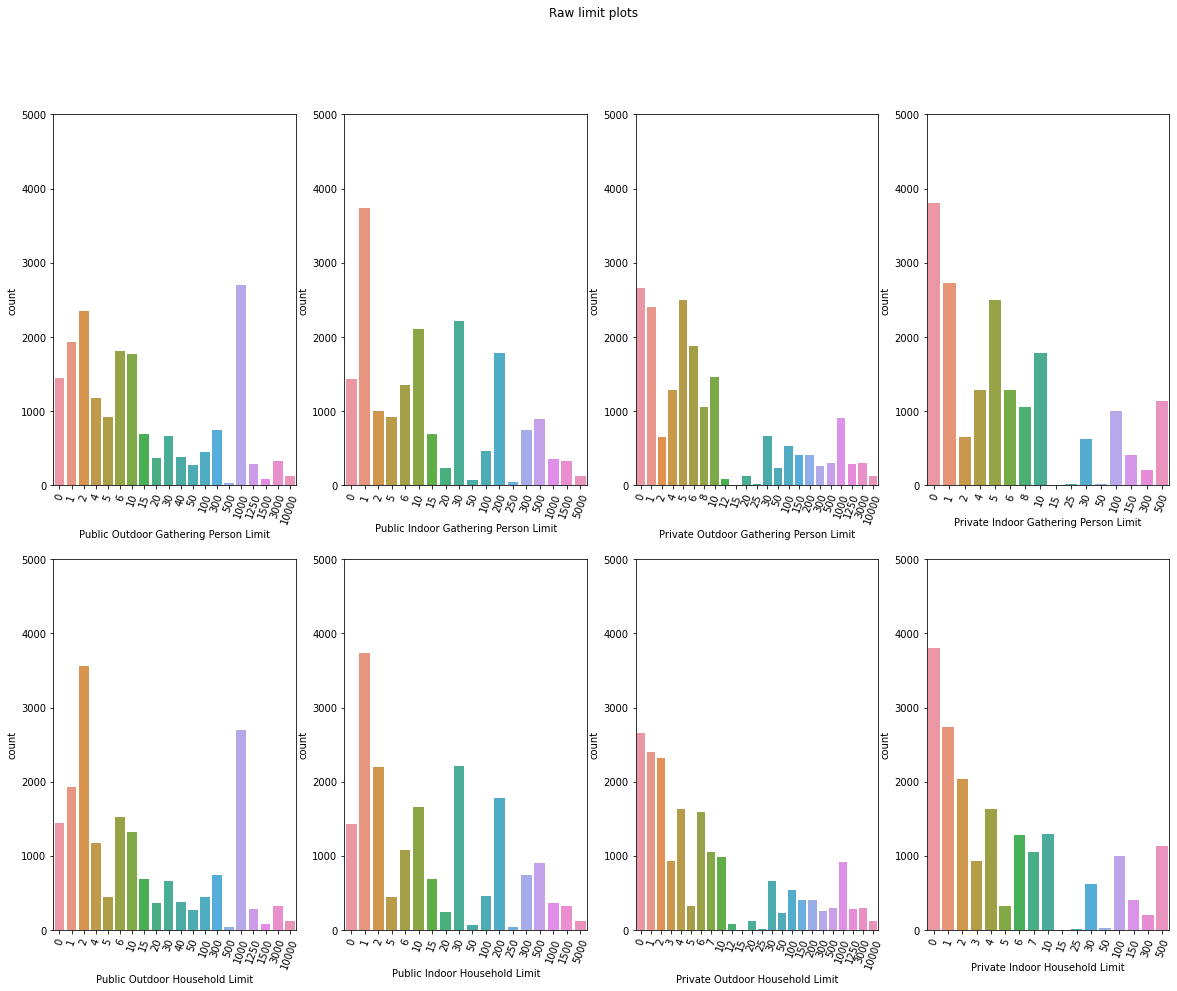

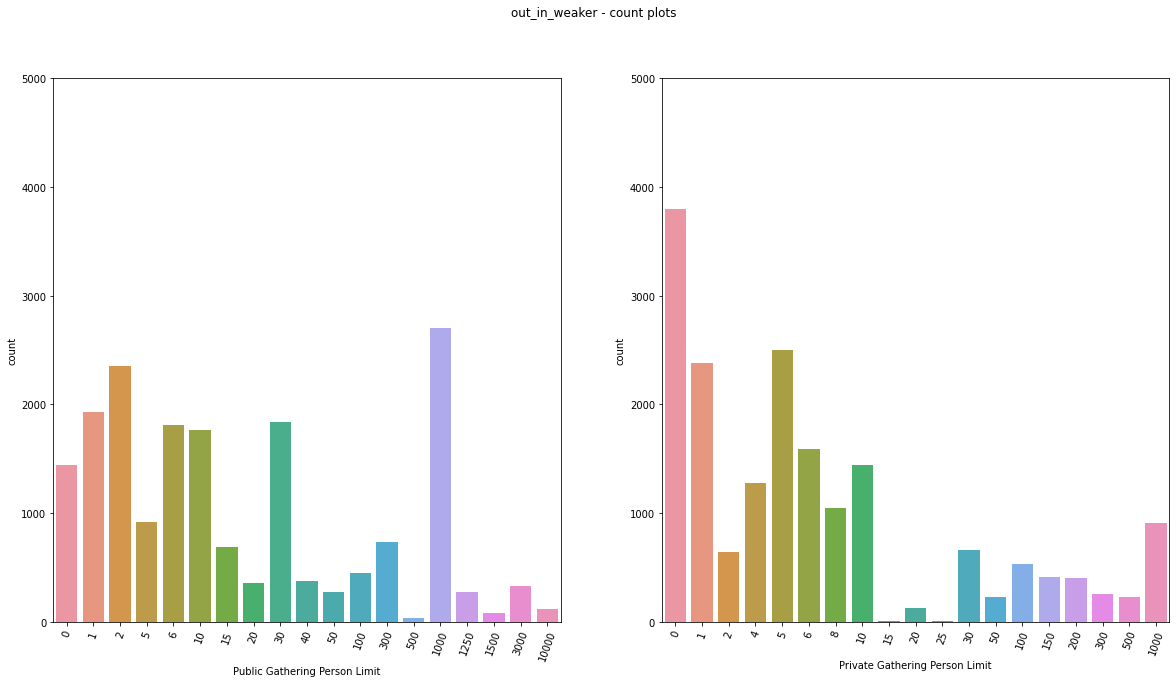

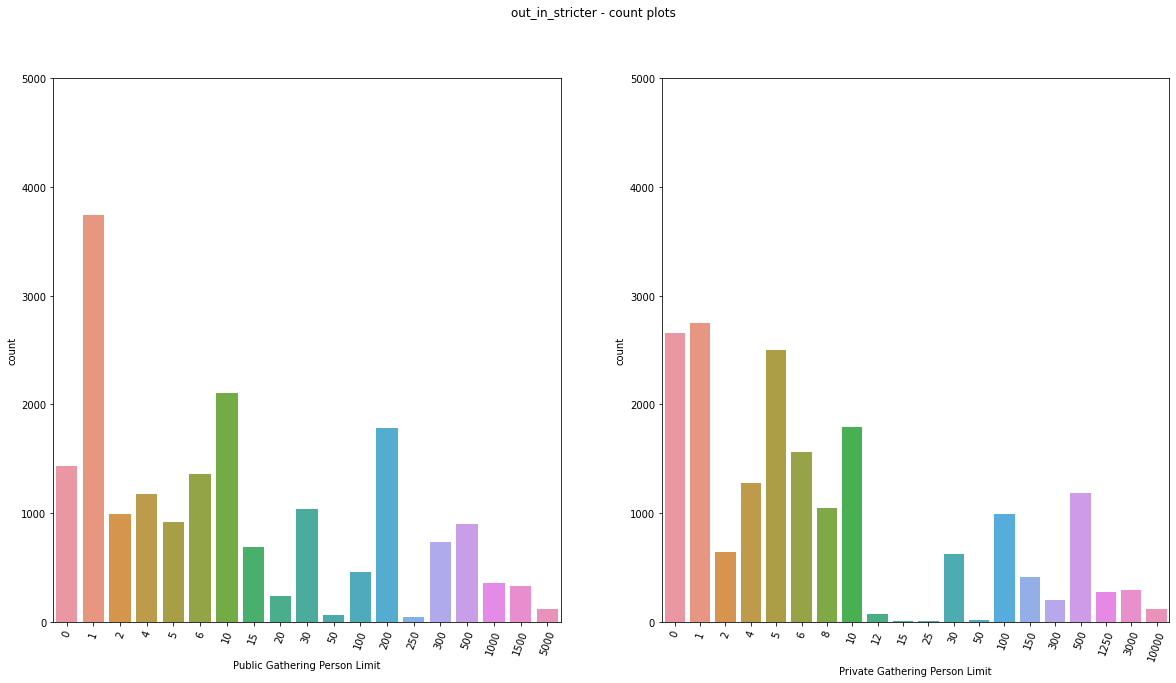

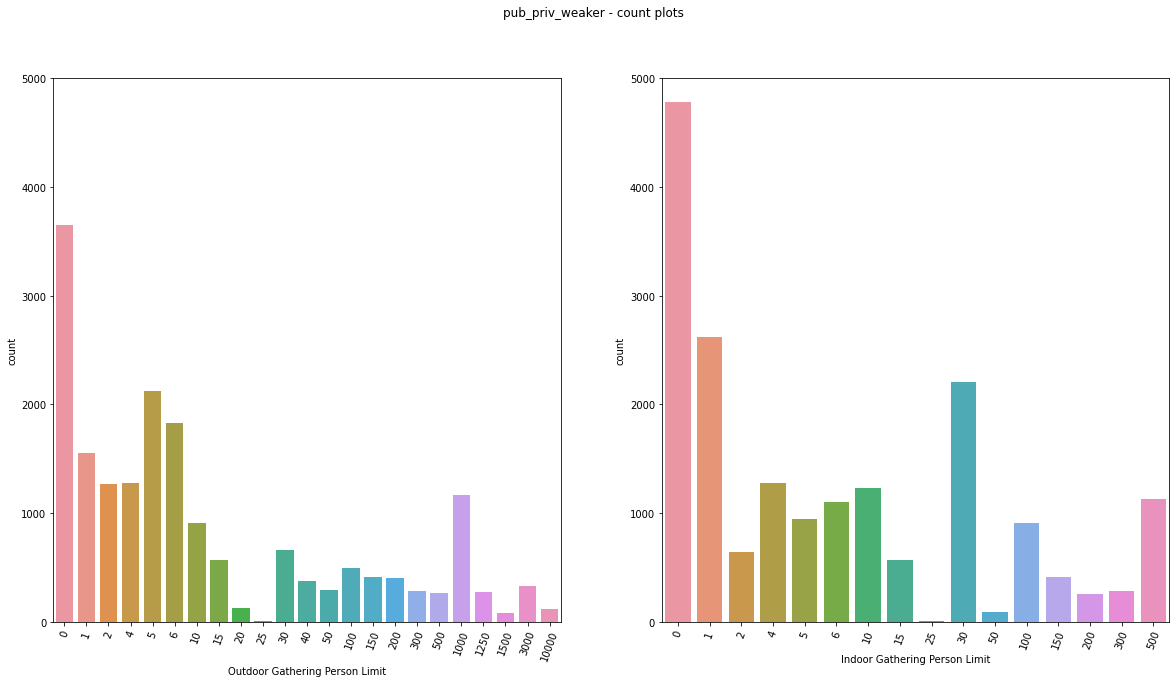

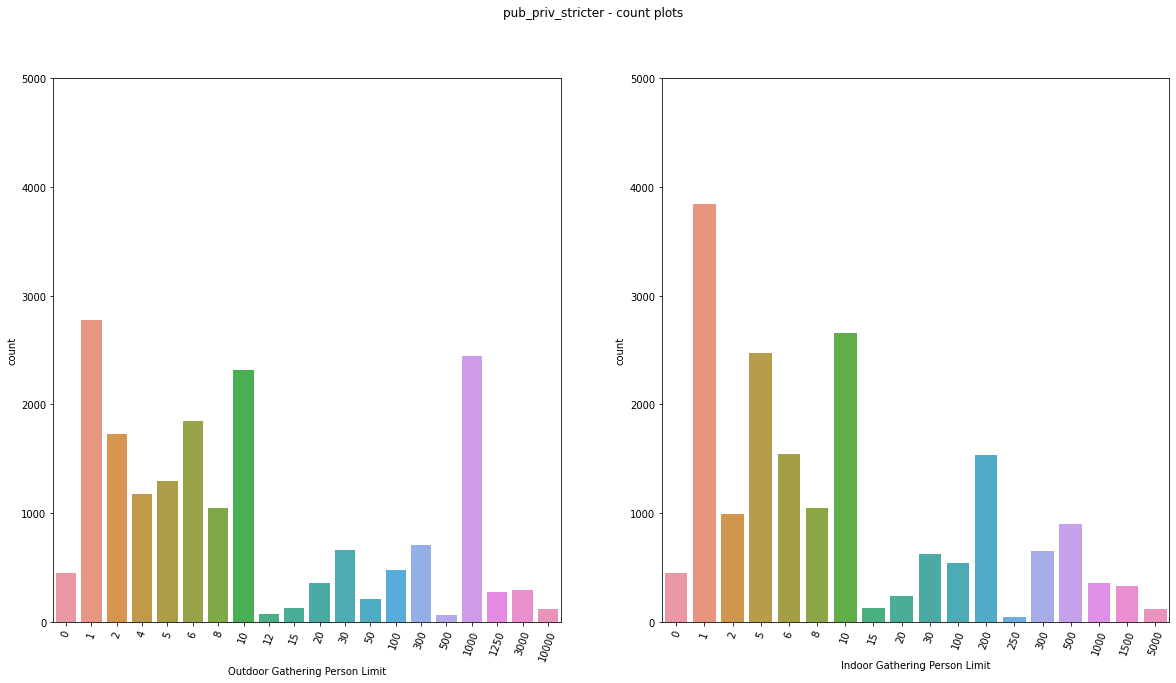

In [17]:
total_plotter(aggregations, aggregation_names, non_featurized)


## Redone plots

In [ ]:

def raw_plots(region_ind, non_featurized):
    j = 0
    raw_CMs = [CM for CM in non_featurized.CMs if 'Limit' in CM]
    raw_indices = np.where(np.isin(raw_CMs,non_featurized.CMs))

    fig = plt.figure(figsize=((25,5)))
    for r in list(raw_indices)[0]:
        ax =  fig.add_subplot(2, 4, j+1)
        limits = non_featurized.active_cms[region_ind, r, :]
        sns.lineplot(x=non_featurized.Ds, y=list(limits), label = f'{non_featurized.CMs[r]}', ax = ax)
        j += 1
    pl.suptitle(f'{non_featurized.Rs[region_ind]}')
    plt.show()

# want a function that plots all relevant npis from an aggregation on the given axis

def plot_relevant_npis_type(ax, npi, region_ind, aggregation, aggregation_name):
    raw_indices = [i for i in range(len(aggregation.CMs)) if aggregation.CMs[i].split(' ')[0] in npi and aggregation.CMs[i].split(' ')[1] in npi and aggregation.CMs[i].split(' ')[-1] == npi.split(' ')[-1]]
    for r in raw_indices:
        limits = aggregation.active_cms[region_ind, r, :]
        if np.var(limits) > 0.01:
            limits = limits + np.random.normal(0,0.07,1)
        sns.lineplot(x=aggregation.Ds, y=list(limits), label = f'{aggregation_name} - {aggregation.CMs[r]}', ax = ax)

def plot_all_features(region_ind, all_features, non_featurized, aggregations, aggregation_names):
    j = 0
    raw_indices = [i for i in range(len(all_features.CMs)) if 'Limit' in all_features.CMs[i]]

    fig = plt.figure(figsize=((30,50)))
    for r in raw_indices:
        ax =  fig.add_subplot(8, 4, j+1)
        limits = all_features.active_cms[region_ind, r, :]
        # if np.var(limits) < 0.01:
        #     gitter = False
        # else:
        #     gitter = True

        sns.lineplot(x=non_featurized.Ds, y=list(limits), label = f'NO FEATURIZATION - {all_features.CMs[r]}', ax = ax)
        for aggregation, agg_name in zip(aggregations, aggregation_names):
            plot_relevant_npis_type(ax, all_features.CMs[r], region_ind, aggregation, agg_name)
        j += 1
    plt.show()

def plot_all(all_features, non_featurized, aggregations, aggregation_names):
    for region_ind in [6, 7, 8, 9, 10, 11, 12, 13]:
        raw_plots(region_ind, non_featurized)
        plot_all_features(region_ind, all_features, non_featurized, aggregations, aggregation_names)

In [ ]:
plot_all(all_features, non_featurized, aggregations, aggregation_names)